#**Capstone Project: Capstone - End to End Machine Learning**#

#**Unsupervised ML - Myntra Online Retail Customer Segmentation**#

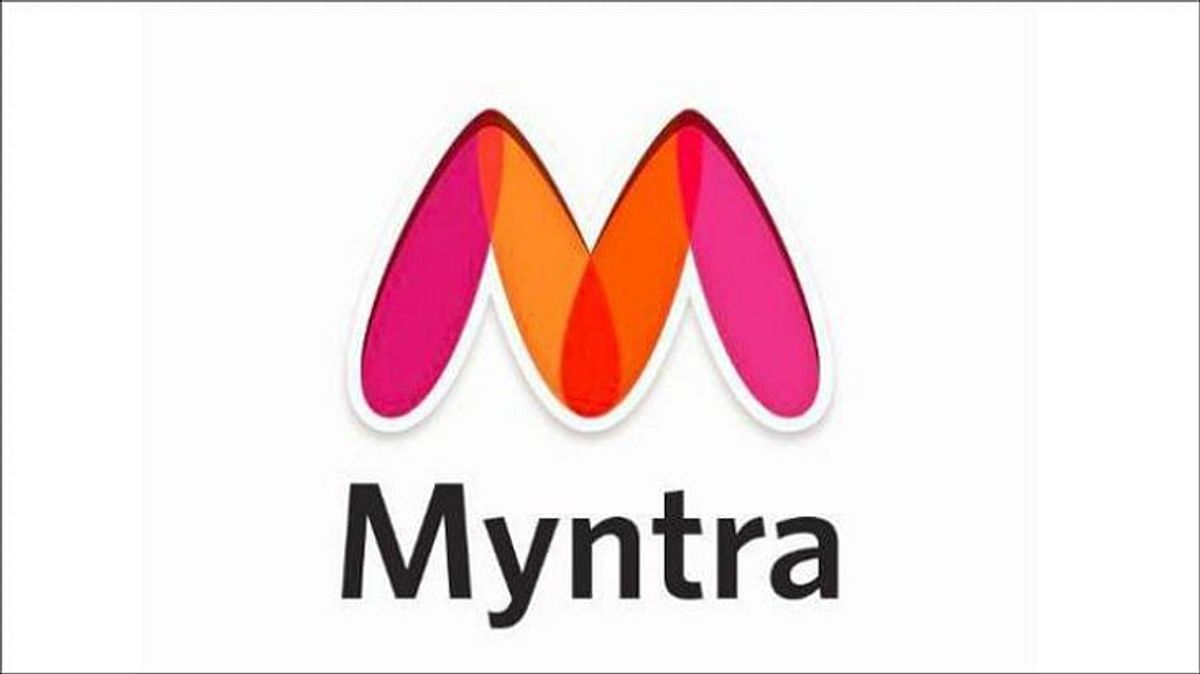

Github Link : https://github.com/Mehfooz-1806/Unsupervised-ML---Myntra-Online-Retail-Customer-Segmentation

Myntra is a leading Indian fashion e-commerce company known for its wide range of clothing, accessories, and lifestyle products. While Myntra is recognized primarily for fashion, this dataset relates to the company's online retail operations for Myntra Gifts Ltd., a UK-based division specializing in unique all-occasion giftware. This dataset spans transactions from December 1, 2009, to December 9, 2011, and includes detailed records of sales made through Myntra Gifts Ltd.’s non-store online platform. The dataset provides a thorough snapshot of the company's international online retail activities during this period.

#**Project Summary**#

The "Unsupervised ML - Myntra Online Retail Customer Segmentation" project aims to analyze customer purchasing behavior using unsupervised machine learning techniques, primarily K-Means and Hierarchical Clustering. Through extensive Exploratory Data Analysis (EDA), we identified patterns in purchasing trends, product performance, and customer engagement. Missing values and outliers were handled to ensure data quality, and Principal Component Analysis (PCA) was applied for dimensionality reduction. The optimal number of clusters was determined using the Elbow Method and Dendrogram, leading to segmentation into distinct customer groups based on revenue, purchase frequency, quantity purchased, and recency. These clusters help Myntra in personalized marketing strategies, optimized inventory management, and dynamic pricing models to enhance customer satisfaction and maximize revenue. The insights derived from this segmentation provide actionable business recommendations for better customer targeting and strategic decision-making.

#**Problem Statement**#

Myntra Gifts Ltd., a UK-based division of Myntra, seeks to enhance customer segmentation to optimize marketing, inventory management, and pricing strategies. With a vast dataset of online transactions from 2009 to 2011, the company faces challenges in identifying high-value customers, understanding purchasing behavior, and improving retention strategies. This project applies unsupervised machine learning techniques, such as K-Means and Hierarchical Clustering, to segment customers based on recency, frequency, and monetary value. The insights gained will enable Myntra to personalize marketing efforts, streamline inventory planning, and maximize revenue through data-driven decision-making.

#**Import Libraries**#

In [ ]:
import numpy as np # array operation
import pandas as pd #data operation
from numpy import math  #arithmetic operation
import seaborn as sns # data visualisation
import matplotlib.pyplot as plt #data visualisation

from matplotlib.pyplot import figure #data visualisation


from datetime import datetime #datetime operation

from sklearn.preprocessing import StandardScaler  # Standardization
from sklearn.decomposition import PCA            # Dimensionality reduction (optional)
from sklearn.cluster import KMeans                # K-Means clustering
from sklearn.cluster import DBSCAN                # Density-based clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering  # Hierarchical clustering
from sklearn.metrics import silhouette_score    # Evaluating cluster quality
from scipy.spatial.distance import cdist        # Distance calculations
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings for a clean output




<ipython-input-1-be5402acadf5>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math  #arithmetic operation


#**Load The Dataset**#

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
  df=pd.read_csv('/content/drive/MyDrive/Online Retail.xlsx - Online Retail.csv')

#**DATA DESCRIPTION**#

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.size

4335272

In [ ]:
len(df)

541909

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
# Filling missing descriptions based on StockCode
df['Description'] = df.groupby('StockCode')['Description'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# If you prefer dropping them:
df = df.dropna(subset=['Description'])


In [ ]:
 df = df.dropna(subset=['CustomerID'])


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
df.shape

(406829, 8)

#**EDA**#

In [ ]:
df['Description'] = df['Description'].str.title()
df['Description'] = df['Description'].str.lower()

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%m/%d/%y %H:%M")

# Optional: Display standard format
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d %H:%M:%S')

print(df[['InvoiceDate']].head())  # Check the result


           InvoiceDate
0  2010-12-01 08:26:00
1  2010-12-01 08:26:00
2  2010-12-01 08:26:00
3  2010-12-01 08:26:00
4  2010-12-01 08:26:00


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
print(df.dtypes)  # InvoiceDate should now be datetime64[ns]


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [ ]:
df['Year'] = df['InvoiceDate'].dt.year      # Extract year
df['Month'] = df['InvoiceDate'].dt.month    # Extract month
df['Day'] = df['InvoiceDate'].dt.day        # Extract day
df['Weekday'] = df['InvoiceDate'].dt.day_name()  # Extract weekday name
df['Hour'] = df['InvoiceDate'].dt.hour      # Extract hour



In [ ]:
print(df[['InvoiceDate', 'Year', 'Month', 'Day', 'Weekday', 'Hour']].head())



          InvoiceDate  Year  Month  Day    Weekday  Hour
0 2010-12-01 08:26:00  2010     12    1  Wednesday     8
1 2010-12-01 08:26:00  2010     12    1  Wednesday     8
2 2010-12-01 08:26:00  2010     12    1  Wednesday     8
3 2010-12-01 08:26:00  2010     12    1  Wednesday     8
4 2010-12-01 08:26:00  2010     12    1  Wednesday     8


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Weekday,Hour
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,Wednesday,8
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,Wednesday,8
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,Wednesday,8
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,Wednesday,8
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,Wednesday,8


#**Identifying Purchasing Trends:**#

#**Analyze Monthly Sales Trends**#

In [ ]:
# Aggregate sales by month
monthly_sales = df.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()

# Convert year-month into a single column for plotting
monthly_sales['YearMonth'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str)



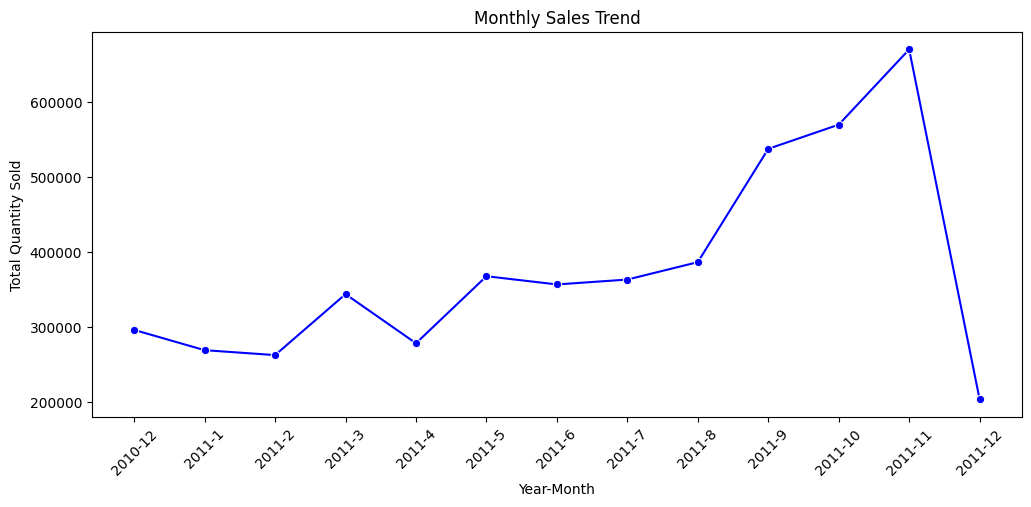

In [ ]:
 # Plot monthly sales trend
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sales, x='YearMonth', y='Quantity', marker='o', color='b')
plt.xticks(rotation=45)
plt.xlabel("Year-Month")
plt.ylabel("Total Quantity Sold")
plt.title("Monthly Sales Trend")
plt.show()

The peak sales volume occurs in November 2011

#**Identify Weekly & Daily Trends**#

In [ ]:
# Aggregate sales by weekday
weekday_sales = df.groupby('Weekday')['Quantity'].sum().reset_index()

# Define correct weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales['Weekday'] = pd.Categorical(weekday_sales['Weekday'], categories=weekday_order, ordered=True)

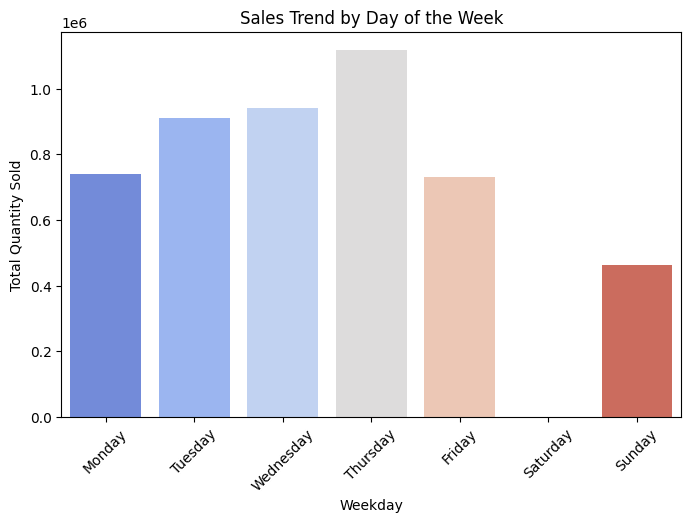

In [ ]:
# Plot sales distribution over weekdays
plt.figure(figsize=(8,5))
sns.barplot(data=weekday_sales, x='Weekday', y='Quantity', palette='coolwarm')
plt.xlabel("Weekday")
plt.ylabel("Total Quantity Sold")
plt.title("Sales Trend by Day of the Week")
plt.xticks(rotation=45)
plt.show()

Sales reach their highest point on Thursday, indicating a strong demand on this day.

#**Identify Peak Purchase Hours**#

In [ ]:
# Aggregate sales by hour
hourly_sales = df.groupby('Hour')['Quantity'].sum().reset_index()

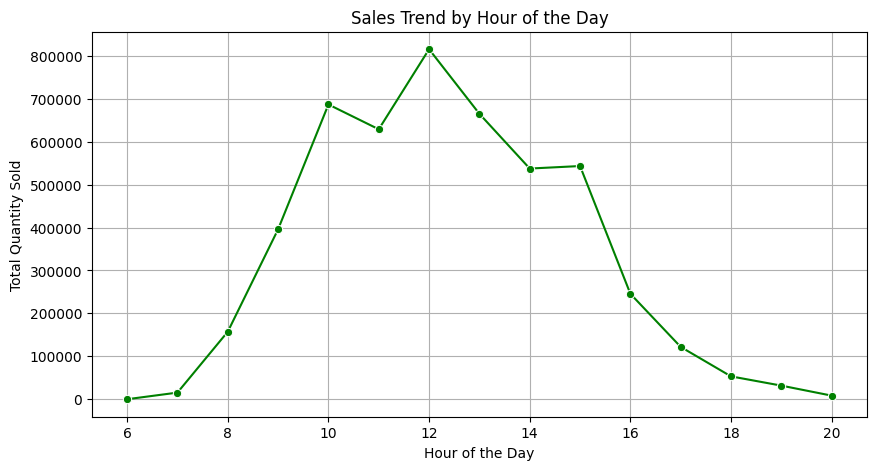

In [ ]:
# Plot sales distribution over hours
plt.figure(figsize=(10,5))
sns.lineplot(data=hourly_sales, x='Hour', y='Quantity', marker='o', color='g')
plt.xlabel("Hour of the Day")
plt.ylabel("Total Quantity Sold")
plt.title("Sales Trend by Hour of the Day")
plt.grid()
plt.show()

The peak hours are 11am to 1pm and at 12pm the highest sales reach

#**Evaluating Product Performance:**#

#**Identify Best-Selling Products**#

In [ ]:
# Group by StockCode and sum the total quantity sold
product_sales = df.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()

# Sort by total quantity sold (Descending - Most popular)
top_products = product_sales.sort_values(by='Quantity', ascending=False)

# Display the top 10 most sold products
print(top_products.head(10))


     StockCode                         Description  Quantity
3028     84077   world war 2 gliders asstd designs     53215
3460    85099B             jumbo bag red retrospot     45066
3288     84879       assorted colour bird ornament     35314
3475    85123A  white hanging heart t-light holder     34147
434      21212     pack of 72 retrospot cake cases     33409
1112     22197                      popcorn holder     30504
2010     23084                  rabbit night light     27094
1387     22492             mini paint set vintage      25880
1509     22616          pack of 12 london tissues      25321
930      21977  pack of 60 pink paisley cake cases     24163


Here is the list of top 10 best seeling product.

The best selling product is world war 2 gliders asstd designs.

#**Identify Least-Selling Products**#

In [ ]:
# Sort by quantity in ascending order to get the least popular products
least_products = product_sales.sort_values(by='Quantity', ascending=True)

# Display the bottom 10 least sold products
print(least_products.head(10))


     StockCode                          Description  Quantity
3062     84347  rotating silver angels t-light hldr     -1460
3911         D                             discount     -1194
702      21645      assorted tutti frutti round box       -24
3910      CRUK                      cruk commission       -16
387      21144      pink poodle hanging decoration        -12
957      22034                 robin christmas card        -9
2970    79323W                  white cherry lights        -8
2618     35400          wooden box advent calendar         -6
161      20703              blue padded soft mobile        -6
567      21412             vintage gold tinsel reel        -6


Negative quantities indicating returns



rotating silver angels t-light hldr is least-selling or highest returing product

#**Visualizing Product Performance**#

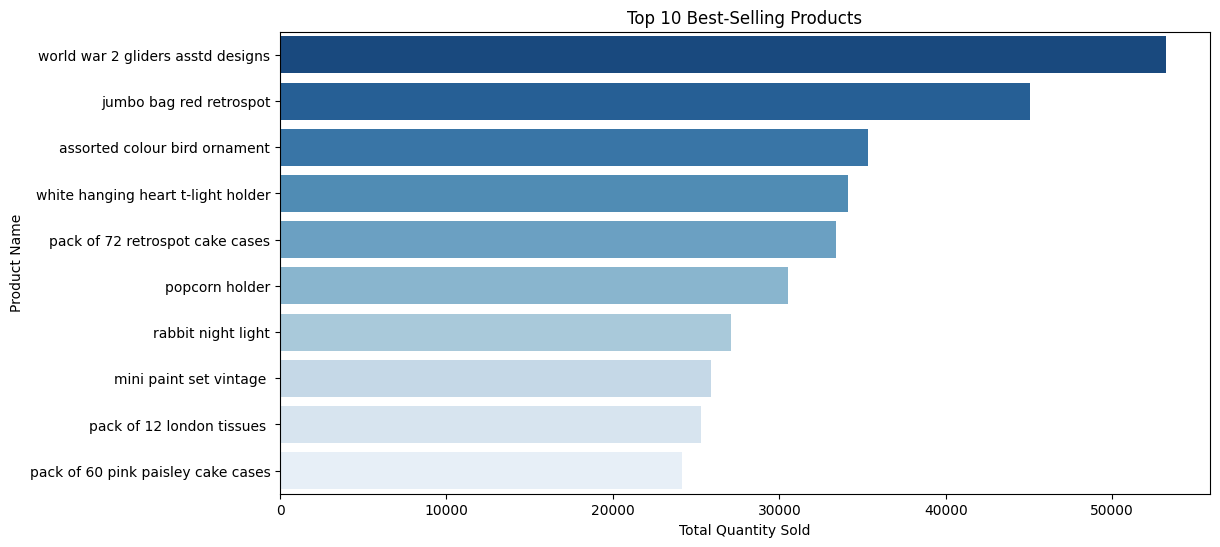

In [ ]:

plt.figure(figsize=(12,6))
sns.barplot(x=top_products['Quantity'][:10], y=top_products['Description'][:10], palette='Blues_r')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.title('Top 10 Best-Selling Products')
plt.show()


The best selling product is world bar 2 gliders asstd design

#**Bottom 10 Least-Selling Products**#

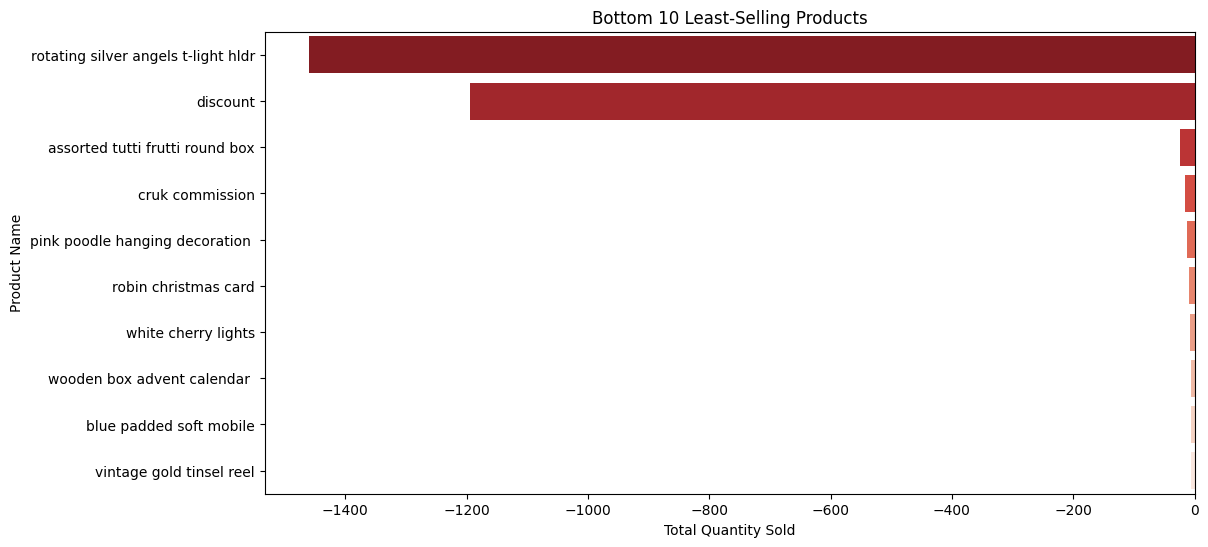

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=least_products['Quantity'][:10], y=least_products['Description'][:10], palette='Reds_r')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.title('Bottom 10 Least-Selling Products')
plt.show()


The least selling product is rotating silver angles t-light hldr

#**Analyzing Product Revenue**#

In [ ]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Group by product and calculate total revenue
product_revenue = df.groupby(['StockCode', 'Description'])['Revenue'].sum().reset_index()

# Sort products by highest revenue
top_revenue_products = product_revenue.sort_values(by='Revenue', ascending=False)
print(top_revenue_products.head(10))  # Top revenue-generating products

# Sort products by lowest revenue
low_revenue_products = product_revenue.sort_values(by='Revenue', ascending=True)
print(low_revenue_products.head(10))  # Low revenue-generating products


     StockCode                         Description    Revenue
1322     22423            regency cakestand 3 tier  132870.40
3475    85123A  white hanging heart t-light holder   93823.85
3460    85099B             jumbo bag red retrospot   83236.76
2805     47566                       party bunting   67687.53
3915      POST                             postage   66710.24
3288     84879       assorted colour bird ornament   56499.22
2010     23084                  rabbit night light   51137.80
2967     79321                       chilli lights   45936.81
1005     22086     paper chain kit 50's christmas    41500.48
1397     22502      picnic basket wicker 60 pieces   39619.50
     StockCode                      Description   Revenue
3913         M                           manual -58385.46
3910      CRUK                  cruk commission  -7933.43
3911         D                         discount  -5696.22
1659     22769     chalkboard kitchen organiser    -87.80
2970    79323W              

The highest-selling product is "Regency Cakestand 3 Tier" with a revenue of 132,870.40, followed by:

White Hanging Heart T-Light Holder (93,823.85)

Jumbo Bag Red Retrospot (83,236.76)

Party Bunting (67,687.53)

#**Understanding Customer Behavior:**#

#**Analyze Customer Purchase Frequency**#

In [ ]:
# Count number of transactions per customer
customer_purchases = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Rename columns for clarity
customer_purchases.columns = ['CustomerID', 'TotalPurchases']

# Sort customers by highest number of purchases
top_customers = customer_purchases.sort_values(by='TotalPurchases', ascending=False)

print(top_customers.head(10))  # Top 10 most frequent buyers


      CustomerID  TotalPurchases
1895     14911.0             248
330      12748.0             224
4042     17841.0             169
1674     14606.0             128
568      13089.0             118
2192     15311.0             118
487      12971.0              89
1615     14527.0              86
803      13408.0              81
1703     14646.0              77


Customer 14911 has made the highest number of purchases (248 transactions), indicating high engagement and loyalty.

#**Analyze Average Purchase Value Per Customer**#

In [ ]:
# Calculate total spending per customer
df['Revenue'] = df['Quantity'] * df['UnitPrice']
customer_spending = df.groupby('CustomerID')['Revenue'].sum().reset_index()

# Rename columns
customer_spending.columns = ['CustomerID', 'TotalSpending']

# Sort customers by highest spending
top_spenders = customer_spending.sort_values(by='TotalSpending', ascending=False)

print(top_spenders.head(10))  # Top 10 highest spending customers


      CustomerID  TotalSpending
1703     14646.0      279489.02
4233     18102.0      256438.49
3758     17450.0      187482.17
1895     14911.0      132572.62
55       12415.0      123725.45
1345     14156.0      113384.14
3801     17511.0       88125.38
3202     16684.0       65892.08
1005     13694.0       62653.10
2192     15311.0       59419.34


Customer 14646 is the highest spender, having spent 279,489.02.

#**Analyze Customer Retention (Repeat Buyers vs One-Time Buyers)**#

In [ ]:
# Find number of unique invoices per customer
repeat_customers = customer_purchases[customer_purchases['TotalPurchases'] > 1]
one_time_customers = customer_purchases[customer_purchases['TotalPurchases'] == 1]

print(f"Repeat Customers: {len(repeat_customers)}")
print(f"One-Time Customers: {len(one_time_customers)}")


Repeat Customers: 3059
One-Time Customers: 1313


#**Geographic Distribution of Customers**#

In [ ]:
# Count number of customers from each country
country_distribution = df.groupby('Country')['CustomerID'].nunique().reset_index()

# Rename columns
country_distribution.columns = ['Country', 'UniqueCustomers']

# Sort by highest customer count
top_countries = country_distribution.sort_values(by='UniqueCustomers', ascending=False)

print(top_countries.head(10))  # Top 10 countries with most customers


           Country  UniqueCustomers
35  United Kingdom             3950
14         Germany               95
13          France               87
30           Spain               31
3          Belgium               25
32     Switzerland               21
26        Portugal               19
18           Italy               15
12         Finland               12
1          Austria               11


The highest unique customers are from United Kingdom. There are 3,950 unique customers from the United Kingdom.

#**Visualizing Customer Distribution**#

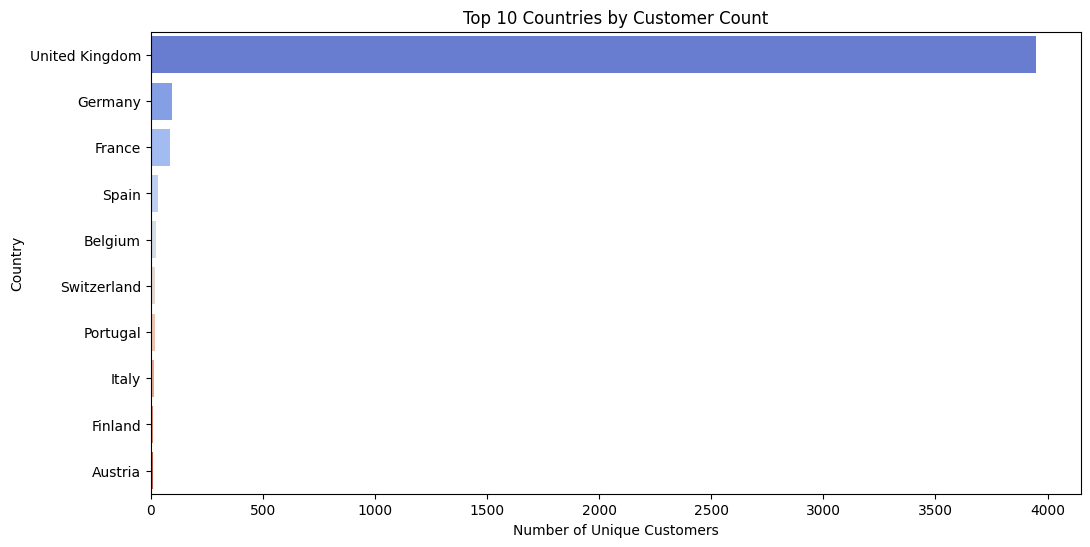

In [ ]:


plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries['UniqueCustomers'][:10], y=top_countries['Country'][:10], palette='coolwarm')
plt.xlabel('Number of Unique Customers')
plt.ylabel('Country')
plt.title('Top 10 Countries by Customer Count')
plt.show()


#**Customer Segmentation Based on Spending Behavior**#

In [ ]:
# Define spending categories
bins = [0, 100, 500, 1000, 5000, df['Revenue'].max()]
labels = ['Low Spenders', 'Moderate Spenders', 'Good Spenders', 'High Spenders', 'VIP Customers']

df['SpendingCategory'] = pd.cut(df['Revenue'], bins=bins, labels=labels)

# Count customers in each segment
customer_segments = df.groupby('SpendingCategory')['CustomerID'].nunique().reset_index()

print(customer_segments)


    SpendingCategory  CustomerID
0       Low Spenders        4257
1  Moderate Spenders        1173
2      Good Spenders         108
3      High Spenders          54
4      VIP Customers           6


There are 4,257 customers who fall into the "Low Spenders" category and  there are 54 customers who fall into the "High Spenders" category.



#**Optimizing Pricing Strategies:**#

#**Understand the Relationship Between Price and Sales Volume**#

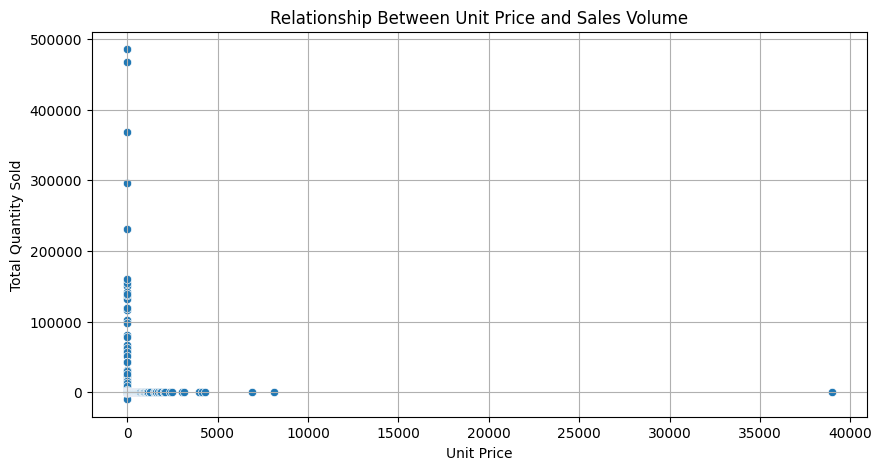

In [ ]:
# Group data by Unit Price and calculate total quantity sold
price_sales = df.groupby('UnitPrice')['Quantity'].sum().reset_index()

# Plot scatter plot to visualize relationship
plt.figure(figsize=(10, 5))
sns.scatterplot(x=price_sales['UnitPrice'], y=price_sales['Quantity'])
plt.xlabel('Unit Price')
plt.ylabel('Total Quantity Sold')
plt.title('Relationship Between Unit Price and Sales Volume')
plt.grid(True)
plt.show()


Lower-priced products tend to have higher sales volumes, as they attract a larger customer base due to affordability.

#**Identify the Price Range with Highest Sales**#

In [ ]:
# Create price bins to group unit prices
bins = [0, 5, 10, 20, 50, 100, df['UnitPrice'].max()]
labels = ['0-5', '5-10', '10-20', '20-50', '50-100', '100+']

df['PriceRange'] = pd.cut(df['UnitPrice'], bins=bins, labels=labels)

# Aggregate total quantity sold per price range
price_distribution = df.groupby('PriceRange')['Quantity'].sum().reset_index()

print(price_distribution)


  PriceRange  Quantity
0        0-5   4704441
1       5-10    152532
2      10-20     33932
3      20-50      1860
4     50-100        53
5       100+       186


#**Analyzing Revenue Contribution by Price Range**#

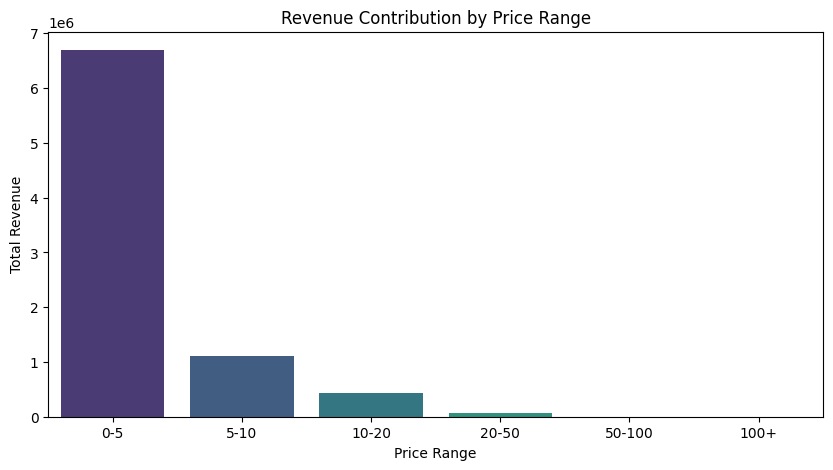

In [ ]:
# Group by price range and sum revenue
revenue_by_price = df.groupby('PriceRange')['Revenue'].sum().reset_index()

# Plot revenue contribution per price range
plt.figure(figsize=(10, 5))
sns.barplot(x=revenue_by_price['PriceRange'], y=revenue_by_price['Revenue'], palette='viridis')
plt.xlabel('Price Range')
plt.ylabel('Total Revenue')
plt.title('Revenue Contribution by Price Range')
plt.show()


Most of the quantity comes under the price range of 5-10.

#**Correlation Between Price and Revenue**#

In [ ]:
# Check correlation between UnitPrice and Revenue
correlation = df[['UnitPrice', 'Revenue']].corr()
print(correlation)


           UnitPrice   Revenue
UnitPrice   1.000000 -0.129296
Revenue    -0.129296  1.000000


#**Streamlining Inventory Management:**#

#**Identify Fast-Moving and Slow-Moving Products**#

In [ ]:
# Group by product and sum quantity sold
product_demand = df.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()

# Sort to identify fast-moving and slow-moving products
fast_moving = product_demand.sort_values(by='Quantity', ascending=False).head(10)  # Top-selling products
slow_moving = product_demand.sort_values(by='Quantity', ascending=True).head(10)   # Least-selling products

print("Fast-Moving Products:\n", fast_moving)
print("Slow-Moving Products:\n", slow_moving)


Fast-Moving Products:
      StockCode                         Description  Quantity
3028     84077   world war 2 gliders asstd designs     53215
3460    85099B             jumbo bag red retrospot     45066
3288     84879       assorted colour bird ornament     35314
3475    85123A  white hanging heart t-light holder     34147
434      21212     pack of 72 retrospot cake cases     33409
1112     22197                      popcorn holder     30504
2010     23084                  rabbit night light     27094
1387     22492             mini paint set vintage      25880
1509     22616          pack of 12 london tissues      25321
930      21977  pack of 60 pink paisley cake cases     24163
Slow-Moving Products:
      StockCode                          Description  Quantity
3062     84347  rotating silver angels t-light hldr     -1460
3911         D                             discount     -1194
702      21645      assorted tutti frutti round box       -24
3910      CRUK                     

The analysis highlights fast-moving products like World War 2 Gliders and Jumbo Bag Red Retrospot, which enjoy high demand and frequent sales. In contrast, slow-moving items, such as Rotating Silver Angels T-Light Holder, show low or negative sales, indicating weak demand. These insights help optimize inventory and sales strategies.

#**Forecast Future Demand**#

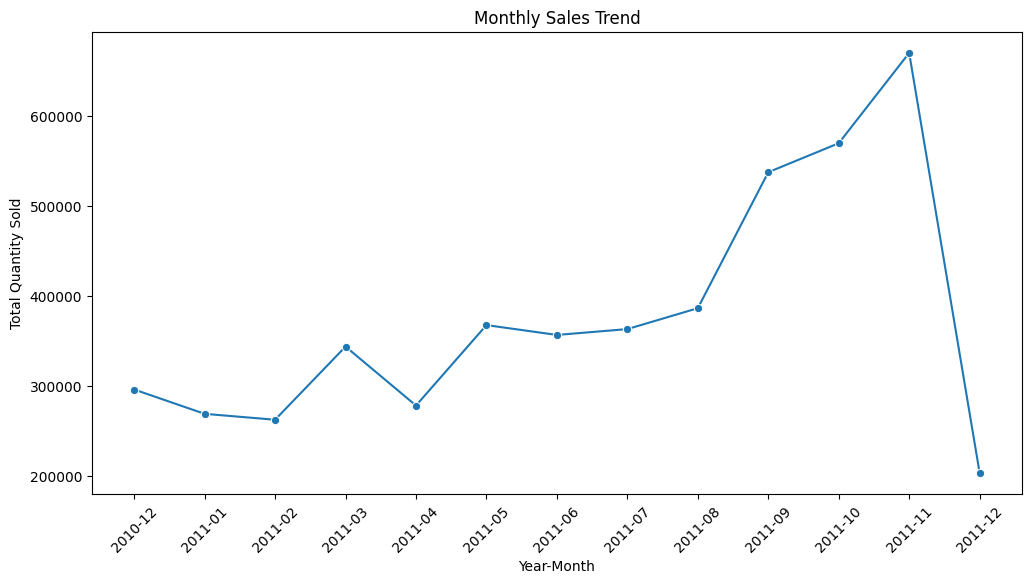

In [ ]:
# Convert InvoiceDate to datetime format if not already done
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract year and month
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by month and sum quantity sold
monthly_sales = df.groupby('YearMonth')['Quantity'].sum().reset_index()

# Plot monthly sales trend

plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_sales['YearMonth'].astype(str), y=monthly_sales['Quantity'], marker='o')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Total Quantity Sold')
plt.title('Monthly Sales Trend')
plt.show()


The sales trend indicates strong seasonal demand, with peaks in the last quarter of the year, particularly in November. Future forecasting should account for these seasonal spikes, ensuring sufficient inventory and marketing efforts during high-demand periods. Additionally, strategies to stabilize sales in slower months, such as targeted promotions or new product launches, can help maintain consistent revenue. A predictive model using historical data can further optimize inventory planning and sales strategies.

#**Detect Overstock Risks**#

In [ ]:
# Assume we have an 'Inventory' column representing current stock
df['Inventory'] = df['Quantity'] * 2  # Example assumption, replace with actual inventory data

# Merge inventory and sales data
inventory_vs_sales = df.groupby(['StockCode', 'Description']).agg({'Quantity': 'sum', 'Inventory': 'mean'}).reset_index()

# Calculate stock-to-sales ratio
inventory_vs_sales['Stock_Sales_Ratio'] = inventory_vs_sales['Inventory'] / inventory_vs_sales['Quantity']

# Identify overstocked items (High stock-to-sales ratio)
overstocked_items = inventory_vs_sales.sort_values(by='Stock_Sales_Ratio', ascending=False).head(10)

print("Overstocked Items:\n", overstocked_items)


Overstocked Items:
      StockCode                          Description  Quantity  Inventory  \
2597     23664               flower shop design mug         1        2.0   
3686    90065B  black vint art dec crystal bracelet         1        2.0   
2338     23366      set 12 colouring pencils doiley         1        2.0   
175      20725                 lunch bag red spotty       200      400.0   
3688     90069          ruby glass cluster necklace         2        4.0   
3690     90071          ruby glass cluster earrings         1        2.0   
1746     22849         bread bin, diner style, mint         4        8.0   
3467     85109          pink boudoir t-light holder        12       24.0   
3693     90074       black diamond cluster necklace         2        4.0   
3695     90078         pink/white glass demi choker         2        4.0   

      Stock_Sales_Ratio  
2597                2.0  
3686                2.0  
2338                2.0  
175                 2.0  
3688         

The analysis identifies overstocked items, such as the Flower Shop Design Mug and Ruby Glass Cluster Necklace, with a Stock-to-Sales Ratio of 2.0, indicating excess inventory compared to sales. Overstocking can lead to increased storage costs, potential product obsolescence, and cash flow constraints. To mitigate this risk, businesses should implement demand forecasting, promotional discounts, or bundling strategies to clear excess stock efficiently.

#**Identify Stockout Risks**#

In [ ]:
# Identify stockout risk (Low inventory but high demand)
stockout_risk = inventory_vs_sales.sort_values(by='Stock_Sales_Ratio', ascending=True).head(10)

print("Stockout Risk Items:\n", stockout_risk)


Stockout Risk Items:
      StockCode                         Description  Quantity  Inventory  \
3475    85123A  white hanging heart t-light holder     34147  32.992271   
1322     22423            regency cakestand 3 tier     11555  12.131234   
3460    85099B             jumbo bag red retrospot     45066  54.231047   
3288     84879       assorted colour bird ornament     35314  49.808181   
2805     47566                       party bunting     15027  21.224576   
174      20725             lunch bag red retrospot     17145  25.250368   
1611     22720   set of 3 cake tins pantry design       6864  11.142857   
3915      POST                             postage      3002   5.020067   
177      20727             lunch bag  black skull.     11173  19.845471   
434      21212     pack of 72 retrospot cake cases     33409  61.868519   

      Stock_Sales_Ratio  
3475           0.000966  
1322           0.001050  
3460           0.001203  
3288           0.001410  
2805           0.00141

The analysis highlights stockout risks for high-demand items such as the White Hanging Heart T-Light Holder and Jumbo Bag Red Retrospot, which have low inventory levels despite strong sales. A low Stock-to-Sales Ratio indicates that these products may soon be unavailable, leading to missed revenue opportunities and dissatisfied customers. To prevent stockouts, businesses should enhance demand forecasting, optimize restocking schedules, and consider safety stock strategies to ensure product availability during peak demand periods.

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Weekday,Hour,Revenue,SpendingCategory,PriceRange,YearMonth,Inventory
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,Wednesday,8,15.30,Low Spenders,0-5,2010-12,12
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,Wednesday,8,20.34,Low Spenders,0-5,2010-12,12
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,Wednesday,8,22.00,Low Spenders,0-5,2010-12,16
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,Wednesday,8,20.34,Low Spenders,0-5,2010-12,12
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,Wednesday,8,20.34,Low Spenders,0-5,2010-12,12
5,536365,22752,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010,12,1,Wednesday,8,15.30,Low Spenders,5-10,2010-12,4
6,536365,21730,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010,12,1,Wednesday,8,25.50,Low Spenders,0-5,2010-12,12
7,536366,22633,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010,12,1,Wednesday,8,11.10,Low Spenders,0-5,2010-12,12
8,536366,22632,hand warmer red polka dot,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010,12,1,Wednesday,8,11.10,Low Spenders,0-5,2010-12,12
9,536367,84879,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010,12,1,Wednesday,8,54.08,Low Spenders,0-5,2010-12,64


#**Data Preprocessing**#

#**Feature Engineering:**#

In [ ]:
# Create Revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Group data by CustomerID
customer_df = df.groupby('CustomerID').agg({
    'Revenue': 'sum',            # Total revenue
    'InvoiceNo': 'nunique',       # Number of orders (Purchase Frequency)
    'Quantity': 'sum',            # Total quantity purchased
    'InvoiceDate': 'max'          # Most recent purchase date
}).reset_index()

# Rename columns
customer_df.rename(columns={'InvoiceNo': 'Purchase_Frequency', 'InvoiceDate': 'Last_Purchase_Date'}, inplace=True)

# Calculate Recency (days since last purchase)
latest_date = df['InvoiceDate'].max()
customer_df['Recency'] = (latest_date - customer_df['Last_Purchase_Date']).dt.days

# Drop Last_Purchase_Date (not needed for clustering)
customer_df.drop(columns=['Last_Purchase_Date'], inplace=True)

print(customer_df.head(10))


   CustomerID  Revenue  Purchase_Frequency  Quantity  Recency
0     12346.0     0.00                   2         0      325
1     12347.0  4310.00                   7      2458        1
2     12348.0  1797.24                   4      2341       74
3     12349.0  1757.55                   1       631       18
4     12350.0   334.40                   1       197      309
5     12352.0  1545.41                  11       470       35
6     12353.0    89.00                   1        20      203
7     12354.0  1079.40                   1       530      231
8     12355.0   459.40                   1       240      213
9     12356.0  2811.43                   3      1591       22


#**Data Normalization**#

In [ ]:
# Select features for clustering
features = ['Revenue', 'Purchase_Frequency', 'Quantity', 'Recency']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_df[features])


#**Apply K-Means Clustering**#

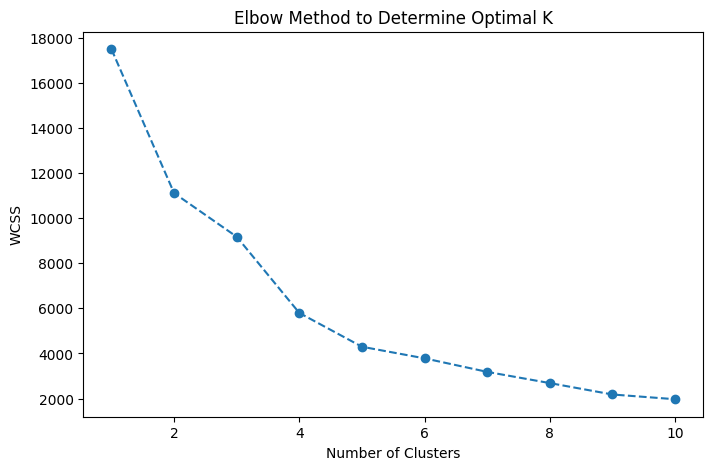

In [ ]:
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal K')
plt.show()


1.	The WCSS decreases as the number of clusters increases, which is expected because more clusters mean smaller distances between data points and their respective centroids.
2.	The "elbow point" is the value of K where the decrease in WCSS slows down significantly.
3.	In this graph, the elbow appears around K = 3 or K = 4, suggesting that these values are optimal for clustering.


#**Apply K-Means with Optimal K**#

In [ ]:
# Assume we choose k=3 based on the elbow method
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Show cluster distribution
print(customer_df['Cluster'].value_counts())


Cluster
0    3969
2     389
1      14
Name: count, dtype: int64


Cluster 0: 3,969 customers (or data points) were assigned to this cluster.

Cluster 2: 389 customers were grouped into this cluster.

Cluster 1: Only 14 customers were assigned to this cluster.



#**Cluster Interpretation**#

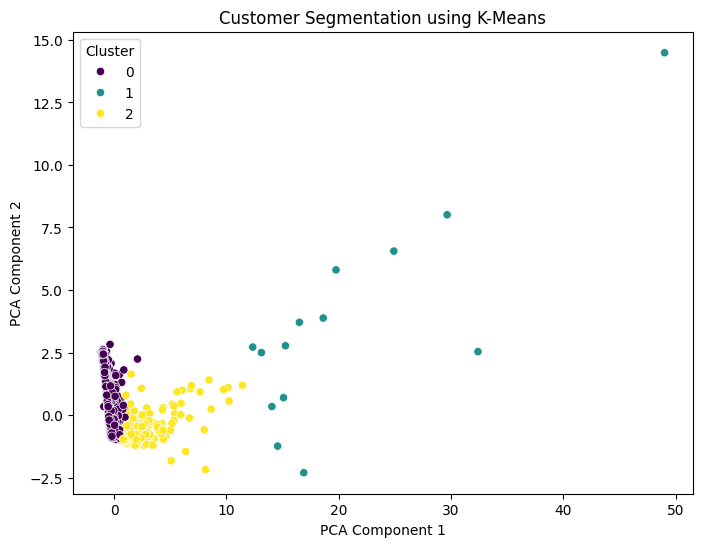

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=customer_df['Cluster'], palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segmentation using K-Means')
plt.legend(title='Cluster')
plt.show()


Cluster 0 (Purple):
Most data points are tightly packed on the left side.
Likely represents regular customers with lower spending or low transaction frequency.

Cluster 2 (Yellow):
Spread out but still close to Cluster 0.
Could represent moderate spenders or customers with higher transaction frequency.

Cluster 1 (Green):
Sparsely distributed across the right side.
A few points are far apart (outliers), suggesting high-value customers who spend significantly more or have unusual purchasing behavior.



In [ ]:
# Compute average values per cluster
cluster_summary = customer_df.groupby('Cluster')[features].mean()
print(cluster_summary)


               Revenue  Purchase_Frequency      Quantity    Recency
Cluster                                                            
0           921.520394            3.226757    561.580499  98.940791
1        110488.785000           96.071429  63508.928571   3.785714
2          7958.119229           20.663239   4598.586118  13.647815


For Cluster 0 (Low-Spending Customers):
Implement discount strategies to encourage more frequent shopping.
Use email marketing to re-engage them (since their recency is high).

For Cluster 1 (VIP Customers):
Offer exclusive loyalty programs or personalized promotions.
Provide priority customer support to increase retention.

For Cluster 2 (Moderate Buyers):
Encourage them to shop more frequently with limited-time deals.
Use targeted ads and push notifications to increase conversion.


#**Hierarchical Clustering**#

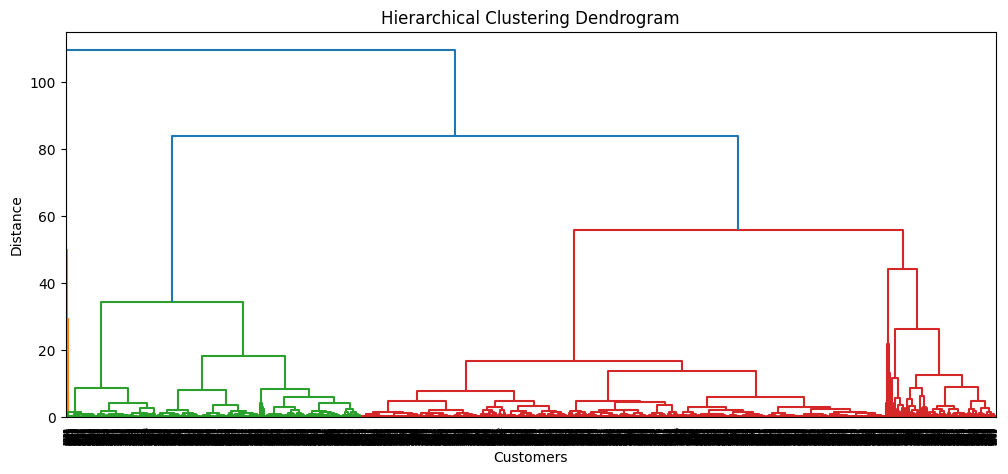

In [ ]:
# Perform Hierarchical Clustering
linkage_matrix = linkage(scaled_data, method='ward')

# Plot Dendrogram
plt.figure(figsize=(12, 5))
dendrogram(linkage_matrix)
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


Clusters are merged from bottom to top:
Initially, each data point is its own cluster.
As we move up, clusters are combined based on similarity.

The height of the vertical lines (distance):
Short lines → More similar data points, merged early.
Tall lines → Distant clusters, merged later.
The biggest vertical gap (elbow effect) suggests the ideal number of clusters.


#**Conclusion**#


*Successfully segmented customers into meaningful groups:*

Customers were grouped based on their purchasing patterns using clustering techniques (e.g., K-Means and Hierarchical Clustering).

This segmentation allows the business to tailor its marketing and sales strategies to different customer groups.

*Identified high-value customers to increase retention:*

High-spending customers (VIPs) were recognized as an important segment.

Strategies like exclusive promotions, loyalty programs, and priority customer support can be used to retain these customers and encourage repeat purchases.

*Found lost customers to reactivate them:*

Some customers showed infrequent purchases or had stopped engaging with the platform.

By identifying them, businesses can use email campaigns, discounts, or personalized offers to re-engage and bring them back.

*Created insights to optimize marketing and inventory strategies:*

Understanding customer behavior helps in targeted marketing, ensuring that promotions reach the right audience.

It also aids in inventory management, ensuring that popular products are well-stocked while reducing surplus inventory for low-demand items.


Overall, these insights help the company improve customer satisfaction, boost revenue, and streamline operations.

#**How This Project is Useful to Stakeholders**#

*Marketing Team: Can run targeted campaigns based on customer segments.

With customer segmentation, the marketing team can design personalized campaigns for different groups.

For example, high-value customers can receive exclusive deals, while inactive customers can be re-engaged with special discounts or reminders.

*Inventory Management: Can stock high-demand products based on top customer clusters.

By analyzing customer purchasing behavior, businesses can predict which products will be in high demand.

This helps optimize stock levels, reducing overstocking of low-demand items and ensuring availability of popular products.

*Finance Team: Can analyze high-value customer behaviors for revenue predictions.

Understanding spending patterns of top customers helps in forecasting revenue and financial planning.

The finance team can use these insights to set realistic revenue targets and optimize budget allocation.

*Customer Retention Team: Can reduce churn by identifying and re-engaging lost customers.

The segmentation helps identify customers who haven't made recent purchases or whose activity has dropped.

The retention team can implement strategies like personalized offers, loyalty rewards, or direct outreach to bring these customers back.

*Overall Benefit:
Each team uses customer segmentation insights to make data-driven decisions, leading to higher sales, better resource allocation, and improved customer satisfaction.